# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [298]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [299]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [300]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [301]:
sinasc_raw['munResLat'].describe()

count    27027.000000
mean       -10.377988
std          1.372942
min        -13.499760
25%        -11.433870
50%        -10.435950
75%         -8.768890
max         -8.768890
Name: munResLat, dtype: float64

In [302]:
pd.cut(sinasc_raw['munResLat'], [-14, -10.5, -7]).value_counts()

(-10.5, -7.0]     14034
(-14.0, -10.5]    12993
Name: munResLat, dtype: int64

In [303]:
lat_municipio = pd.cut(sinasc_raw['munResLat'], [-14, -10.5, -7])
lat_municipio

0        (-14.0, -10.5]
1        (-14.0, -10.5]
2        (-14.0, -10.5]
3        (-14.0, -10.5]
4        (-14.0, -10.5]
              ...      
27023    (-14.0, -10.5]
27024    (-14.0, -10.5]
27025    (-14.0, -10.5]
27026    (-14.0, -10.5]
27027    (-14.0, -10.5]
Name: munResLat, Length: 27028, dtype: category
Categories (2, interval[float64, right]): [(-14.0, -10.5] < (-10.5, -7.0]]

In [304]:
sinasc_raw.pivot_table(values = ['CONSULTAS', 'QTDFILMORT'],
                       index = [lat_municipio],
                       aggfunc = [sum, 'mean', min, max, 'median', 'std'])

sum                 mean                  min             \
               CONSULTAS QTDFILMORT CONSULTAS QTDFILMORT CONSULTAS QTDFILMORT   
munResLat                                                                       
(-14.0, -10.5]     48000     3105.0  3.694297   0.242521         1        0.0   
(-10.5, -7.0]      48662     3538.0  3.467436   0.291770         1        0.0   

                     max               median                  std             
               CONSULTAS QTDFILMORT CONSULTAS QTDFILMORT CONSULTAS QTDFILMORT  
munResLat                                                                      
(-14.0, -10.5]         9       28.0         4        0.0  0.643372   0.599430  
(-10.5, -7.0]          9        9.0         4        0.0  0.888240   0.627856

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [305]:
sinasc_raw['munResArea'].describe()

count    27027.000000
mean     14702.799767
std      13706.177751
min        459.978000
25%       3792.998000
50%       6896.648000
75%      34096.394000
max      34096.394000
Name: munResArea, dtype: float64

In [306]:
pd.cut(sinasc_raw['munResArea'], [400, 3000, 35000]).value_counts()

(3000, 35000]    21808
(400, 3000]       5219
Name: munResArea, dtype: int64

In [307]:
area_municipio = pd.cut(sinasc_raw['munResArea'], [400, 3000, 35000])
area_municipio

0        (3000, 35000]
1        (3000, 35000]
2        (3000, 35000]
3        (3000, 35000]
4        (3000, 35000]
             ...      
27023    (3000, 35000]
27024    (3000, 35000]
27025    (3000, 35000]
27026    (3000, 35000]
27027      (400, 3000]
Name: munResArea, Length: 27028, dtype: category
Categories (2, interval[int64, right]): [(400, 3000] < (3000, 35000]]

In [308]:
sinasc_raw.pivot_table(values = ['IDADEPAI', 'QTDFILVIVO'],
                       index = [area_municipio],
                       aggfunc = [sum, 'mean', min, max, 'median', 'std'])

sum                  mean                 min             \
               IDADEPAI QTDFILVIVO   IDADEPAI QTDFILVIVO IDADEPAI QTDFILVIVO   
munResArea                                                                     
(400, 3000]     78074.0     4773.0  31.092792   0.924284     16.0        0.0   
(3000, 35000]  158424.0    22053.0  31.094014   1.086890     15.0        0.0   

                   max              median                  std             
              IDADEPAI QTDFILVIVO IDADEPAI QTDFILVIVO  IDADEPAI QTDFILVIVO  
munResArea                                                                  
(400, 3000]       69.0       30.0     30.0        1.0  7.675474   1.075442  
(3000, 35000]     86.0       14.0     30.0        1.0  7.818364   1.191750

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [309]:
sinasc_raw['munResAlt'].describe()

count    27027.000000
mean       179.111999
std        123.138365
min         85.000000
25%         87.000000
50%        153.000000
75%        191.000000
max        595.000000
Name: munResAlt, dtype: float64

In [310]:
alt_mun = pd.qcut(sinasc_raw['munResAlt'], 2)
alt_mun

0        (153.0, 595.0]
1        (153.0, 595.0]
2        (153.0, 595.0]
3        (153.0, 595.0]
4        (153.0, 595.0]
              ...      
27023    (153.0, 595.0]
27024    (153.0, 595.0]
27025    (153.0, 595.0]
27026    (153.0, 595.0]
27027    (153.0, 595.0]
Name: munResAlt, Length: 27028, dtype: category
Categories (2, interval[float64, right]): [(84.999, 153.0] < (153.0, 595.0]]

In [315]:
sinasc_raw.pivot_table(values=['PESO', 'APGAR5'],
                      index=[alt_mun],
                      aggfunc=[sum, 'mean', min, max, 'median', 'std'])

sum                mean                 min         max  \
                   APGAR5      PESO    APGAR5         PESO APGAR5 PESO APGAR5   
munResAlt                                                                       
(84.999, 153.0]  124967.0  44229404  9.228105  3246.909705    0.0  295   10.0   
(153.0, 595.0]   122172.0  43424338  9.129577  3239.413502    0.0  258   10.0   

                      median             std              
                 PESO APGAR5  PESO    APGAR5        PESO  
munResAlt                                                 
(84.999, 153.0]  5135    9.0  3280  0.784251  559.865952  
(153.0, 595.0]   5985    9.0  3265  0.793880  528.970526

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [265]:
imediatas = {
        "Porto Velho": "Porto Velho",
        "Ji-Paraná": "Ji-Paraná",
        "Ariquemes": "Ariquemes",
        "Vilhena": "Vilhena",
        "Cacoal": "Cacoal",
        "Rolim de Moura": "Cacoal",
        "Jaru": "Jaru",
        "Guajará-Mirim": "Porto Velho",
        "Ouro Preto do Oeste": "Ji-Paraná",
        "Pimenta Bueno": "Cacoal",
        "Buritis": "Ariquemes",
        "Machadinho D'Oeste": "Jaru",
        "Espigão D'Oeste": "Cacoal",
        "Nova Mamoré": "Porto Velho",
        "Alta Floresta D'Oeste": "Cacoal",
        "São Miguel do Guaporé": "Ji-Paraná",
        "Candeias do Jamari": "Porto Velho",
        "Presidente Médici": "Ji-Paraná",
        "São Francisco do Guaporé": "Ji-Paraná",
        "Nova Brasilândia D'Oeste": "Cacoal",
        "Cerejeiras": "Vilhena",
        "Costa Marques": "Ji-Paraná",
        "Alto Paraíso": "Ariquemes",
        "Colorado do Oeste": "Vilhena",
        "Alvorada D'Oeste": "Ji-Paraná",
        "Cujubim": "Ariquemes",
        "Monte Negro": "Ariquemes",
        "Urupá": "Ji-Paraná",
        "Seringueiras": "Ji-Paraná",
        "Campo Novo de Rondônia": "Ariquemes",
        "Mirante da Serra": "Ji-Paraná",
        "Chupinguaia": "Vilhena",
        "Alto Alegre dos Parecis": "Cacoal",
        "Corumbiara": "Vilhena",
        "Governador Jorge Teixeira": "Jaru",
        "Itapuã do Oeste": "Porto Velho",
        "Nova União": "Ji-Paraná",
        "Santa Luzia D'Oeste": "Cacoal",
        "Novo Horizonte do Oeste": "Cacoal",
        "Theobroma": "Jaru",
        "Vale do Anari": "Jaru",
        "Ministro Andreazza": "Cacoal",
        "Vale do Paraíso": "Ji-Paraná",
        "Cabixi": "Vilhena",
        "Cacaulândia": "Ariquemes",
        "Teixeirópolis": "Ji-Paraná",
        "São Felipe D'Oeste": "Cacoal",
        "Rio Crespo": "Ariquemes",
        "Parecis": "Cacoal",
        "Primavera de Rondônia": "Cacoal",
        "Pimenteiras do Oeste": "Vilhena",
        "Castanheiras": "Cacoal",
}

In [266]:
sinasc_raw = sinasc_raw.set_index('munResNome')

In [267]:
idade_mae_imediatas = sinasc_raw.groupby(['DTNASC', imediatas])['IDADEMAE'].mean().unstack()
idade_mae_imediatas

munResNome,Ariquemes,Cacoal,Jaru,Ji-Paraná,Porto Velho,Vilhena
DTNASC,,,,,,
2019-01-01,23.200000,23.250000,31.000000,24.142857,21.388889,27.750000
2019-01-02,26.166667,27.666667,30.800000,25.545455,26.050000,28.727273
2019-01-03,24.142857,27.846154,26.000000,27.000000,26.638889,23.375000
2019-01-04,24.666667,25.230769,22.500000,23.125000,28.814815,26.000000
2019-01-05,22.888889,23.200000,23.250000,27.100000,27.250000,28.200000
...,...,...,...,...,...,...
2019-12-27,24.666667,24.000000,25.333333,27.466667,28.410256,27.000000
2019-12-28,23.833333,22.888889,23.333333,26.375000,26.291667,22.666667
2019-12-29,23.166667,24.100000,24.666667,24.125000,25.470588,24.250000


Text(0, 0.5, 'Idade média mulheres')

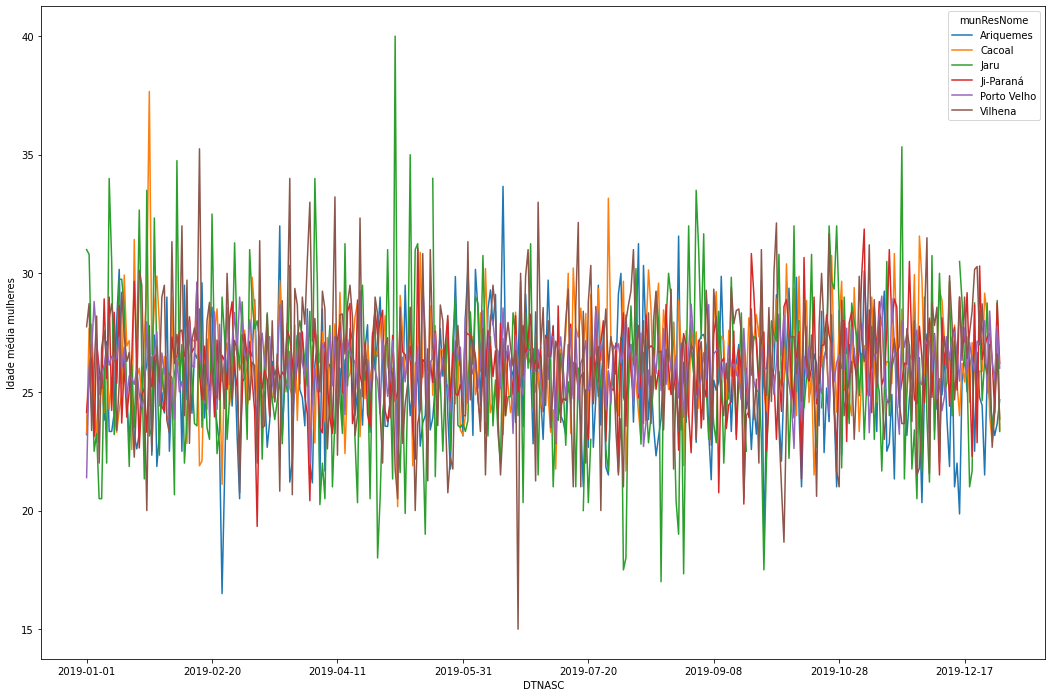

In [268]:
idade_mae_imediatas.plot(figsize=[18,12])
plt.ylabel('Idade média mulheres')

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [142]:
IDH =    {
        "Porto Velho": "Alto",
        "Ji-Paraná": "Alto",
        "Ariquemes": "Alto",
        "Vilhena": "Alto",
        "Cacoal": "Alto",
        "Rolim de Moura": "Alto",
        "Jaru": "Médio",
        "Guajará-Mirim": "Médio",
        "Ouro Preto do Oeste": "Médio",
        "Pimenta Bueno": "Alto",
        "Buritis": "Médio",
        "Machadinho D'Oeste": "Baixo",
        "Espigão D'Oeste": "Médio",
        "Nova Mamoré": "Baixo",
        "Alta Floresta D'Oeste": "Médio",
        "São Miguel do Guaporé": "Médio",
        "Candeias do Jamari": "Médio",
        "Presidente Médici": "Médio",
        "São Francisco do Guaporé": "Médio",
        "Nova Brasilândia D'Oeste": "Médio",
        "Cerejeiras": "Médio",
        "Costa Marques": "Médio",
        "Alto Paraíso": "Médio",
        "Colorado do Oeste": "Médio",
        "Alvorada D'Oeste": "Médio",
        "Cujubim": "Médio",
        "Monte Negro": "Médio",
        "Urupá": "Médio",
        "Seringueiras": "Baixo",
        "Campo Novo de Rondônia": "Baixo",
        "Mirante da Serra": "Médio",
        "Chupinguaia": "Médio",
        "Alto Alegre dos Parecis": "Baixo",
        "Corumbiara": "Médio",
        "Governador Jorge Teixeira": "Baixo",
        "Itapuã do Oeste": "Médio",
        "Nova União": "Baixo",
        "Santa Luzia D'Oeste": "Médio",
        "Novo Horizonte do Oeste": "Médio",
        "Theobroma": "Baixo",
        "Vale do Anari": "Baixo",
        "Ministro Andreazza": "Médio",
        "Vale do Paraíso": "Médio",
        "Cabixi": "Médio",
        "Cacaulândia": "Médio",
        "Teixeirópolis": "Médio",
        "São Felipe D'Oeste": "Médio",
        "Rio Crespo": "Médio",
        "Parecis": "Médio",
        "Primavera de Rondônia": "Médio",
        "Pimenteiras do Oeste": "Médio",
        "Castanheiras": "Médio",
}

In [270]:
idh_mun = sinasc_raw.groupby(IDH)['IDADEMAE'].mean()
idh_mun

munResNome
Alto     26.280332
Baixo    25.326944
Médio    25.884855
Name: IDADEMAE, dtype: float64

In [152]:
idh_mun = sinasc_raw.groupby(IDH)['ESCMAE'].value_counts()
idh_mun

munResNome  ESCMAE         
Alto        8 a 11 anos        9395
            12 anos ou mais    4119
            4 a 7 anos         2809
            1 a 3 anos          286
            Nenhuma              23
Baixo       8 a 11 anos        1112
            4 a 7 anos          421
            12 anos ou mais     222
            1 a 3 anos           49
            Nenhuma               3
Médio       8 a 11 anos        5125
            4 a 7 anos         1530
            12 anos ou mais    1426
            1 a 3 anos          181
            Nenhuma              14
Name: ESCMAE, dtype: int64

In [172]:
idh_mun = sinasc_raw.groupby(IDH)['QTDFILVIVO'].sum()
idh_mun

munResNome
Alto     16228.0
Baixo     1860.0
Médio     8738.0
Name: QTDFILVIVO, dtype: float64

In [173]:
idh_mun = sinasc_raw.groupby(IDH)['QTDFILMORT'].sum()
idh_mun

munResNome
Alto     4201.0
Baixo     420.0
Médio    2022.0
Name: QTDFILMORT, dtype: float64

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [153]:
IFDM =    {
        "Porto Velho": "Moderado",
        "Ji-Paraná": "Moderado",
        "Ariquemes": "Moderado",
        "Vilhena": "Moderado",
        "Cacoal": "Moderado",
        "Rolim de Moura": "Moderado",
        "Jaru": "Moderado",
        "Guajará-Mirim": "Regular",
        "Ouro Preto do Oeste": "Moderado",
        "Pimenta Bueno": "Moderado",
        "Buritis": "Moderado",
        "Machadinho D'Oeste": "Regular",
        "Espigão D'Oeste": "Regular",
        "Nova Mamoré": "Regular",
        "Alta Floresta D'Oeste": "Moderado",
        "São Miguel do Guaporé": "Moderado",
        "Candeias do Jamari": "Moderado",
        "Presidente Médici": "Moderado",
        "São Francisco do Guaporé": "Moderado",
        "Nova Brasilândia D'Oeste": "Regular",
        "Cerejeiras": "Regular",
        "Costa Marques": "Regular",
        "Alto Paraíso": "Regular",
        "Colorado do Oeste": "Moderado",
        "Alvorada D'Oeste": "Regular",
        "Cujubim": "Regular",
        "Monte Negro": "Moderado",
        "Urupá": "Moderado",
        "Seringueiras": "Regular",
        "Campo Novo de Rondônia": "Regular",
        "Mirante da Serra": "Regular",
        "Chupinguaia": "Moderado",
        "Alto Alegre dos Parecis": "Regular",
        "Corumbiara": "Regular",
        "Governador Jorge Teixeira": "Regular",
        "Itapuã do Oeste": "Regular",
        "Nova União": "Regular",
        "Santa Luzia D'Oeste": "Moderado",
        "Novo Horizonte do Oeste": "Regular",
        "Theobroma": "Regular",
        "Vale do Anari": "Regular",
        "Ministro Andreazza": "Regular",
        "Vale do Paraíso": "Regular",
        "Cabixi": "Regular",
        "Cacaulândia": "Regular",
        "Teixeirópolis": "Moderado",
        "São Felipe D'Oeste": "Moderado",
        "Rio Crespo": "Moderado",
        "Parecis": "Regular",
        "Primavera de Rondônia": "Moderado",
        "Pimenteiras do Oeste": "Moderado",
        "Castanheiras": "Regular",
}

In [286]:
ifdm_mun = sinasc_raw.groupby(['DTNASC', IFDM])['IDADEMAE'].median().unstack()
ifdm_mun

munResNome,Moderado,Regular
DTNASC,,
2019-01-01,22.5,23.0
2019-01-02,26.0,26.5
2019-01-03,27.0,26.0
2019-01-04,25.0,28.0
2019-01-05,26.0,26.0
...,...,...
2019-12-27,27.0,23.0
2019-12-28,24.0,24.0
2019-12-29,24.5,22.5


<AxesSubplot:xlabel='DTNASC'>

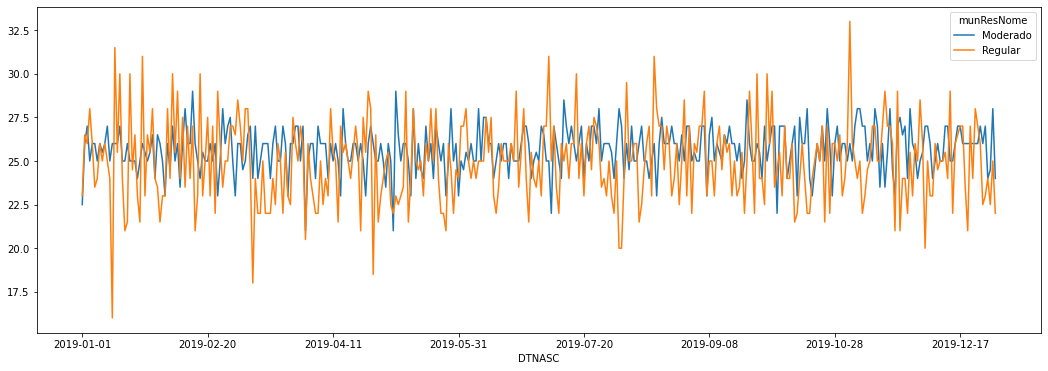

In [287]:
ifdm_mun.plot(figsize=[18,6])

In [160]:
ifdm_mun = sinasc_raw.groupby(IFDM)['ESCMAE'].value_counts()
ifdm_mun

munResNome  ESCMAE         
Moderado    8 a 11 anos        12379
            12 anos ou mais     5014
            4 a 7 anos          3620
            1 a 3 anos           395
            Nenhuma               30
Regular     8 a 11 anos         3253
            4 a 7 anos          1140
            12 anos ou mais      753
            1 a 3 anos           121
            Nenhuma               10
Name: ESCMAE, dtype: int64

In [170]:
ifdm_mun = sinasc_raw.groupby(IFDM)['QTDFILVIVO'].sum()
ifdm_mun

munResNome
Moderado    20844.0
Regular      5982.0
Name: QTDFILVIVO, dtype: float64

In [171]:
ifdm_mun = sinasc_raw.groupby(IFDM)['QTDFILMORT'].sum()
ifdm_mun

munResNome
Moderado    5352.0
Regular     1291.0
Name: QTDFILMORT, dtype: float64

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [161]:
PIB =    {
        "Porto Velho": "Acima de 1 Bilhão",
        "Ji-Paraná": "Acima de 1 Bilhão",
        "Ariquemes": "Acima de 1 Bilhão",
        "Vilhena": "Acima de 1 Bilhão",
        "Cacoal": "Acima de 1 Bilhão",
        "Rolim de Moura": "Acima de 1 Bilhão",
        "Jaru": "Acima de 1 Bilhão",
        "Guajará-Mirim": "Acima de 500 Milhões",
        "Ouro Preto do Oeste": "Acima de 500 Milhões",
        "Pimenta Bueno": "Acima de 1 Bilhão",
        "Buritis": "Acima de 500 Milhões",
        "Machadinho D'Oeste": "Acima de 500 Milhões",
        "Espigão D'Oeste": "Acima de 500 Milhões",
        "Nova Mamoré": "Acima de 500 Milhões",
        "Alta Floresta D'Oeste": "Acima de 300 Milhões",
        "São Miguel do Guaporé": "Acima de 500 Milhões",
        "Candeias do Jamari": "Acima de 500 Milhões",
        "Presidente Médici": "Acima de 300 Milhões",
        "São Francisco do Guaporé": "Acima de 300 Milhões",
        "Nova Brasilândia D'Oeste": "Acima de 300 Milhões",
        "Cerejeiras": "Acima de 500 Milhões",
        "Costa Marques": "Acima de 100 Milhões",
        "Alto Paraíso": "Acima de 300 Milhões",
        "Colorado do Oeste": "Acima de 300 Milhões",
        "Alvorada D'Oeste": "Acima de 200 Milhões",
        "Cujubim": "Acima de 300 Milhões",
        "Monte Negro": "Acima de 200 Milhões",
        "Urupá": "Acima de 100 Milhões",
        "Seringueiras": "Acima de 100 Milhões",
        "Campo Novo de Rondônia": "Acima de 200 Milhões",
        "Mirante da Serra": "Acima de 100 Milhões",
        "Chupinguaia": "Acima de 100 Milhões",
        "Alto Alegre dos Parecis": "Acima de 200 Milhões",
        "Corumbiara": "Acima de 100 Milhões",
        "Governador Jorge Teixeira": "Acima de 100 Milhões",
        "Itapuã do Oeste": "Acima de 100 Milhões",
        "Nova União": "Até 100 Milhões",
        "Santa Luzia D'Oeste": "Acima de 100 Milhões",
        "Novo Horizonte do Oeste": "Acima de 100 Milhões",
        "Theobroma": "Acima de 100 Milhões",
        "Vale do Anari": "Acima de 100 Milhões",
        "Ministro Andreazza": "Acima de 100 Milhões",
        "Vale do Paraíso": "Acima de 100 Milhões",
        "Cabixi": "Acima de 100 Milhões",
        "Cacaulândia": "Acima de 100 Milhões",
        "Teixeirópolis": "Até 100 Milhões",
        "São Felipe D'Oeste": "Até 100 Milhões",
        "Rio Crespo": "Até 100 Milhões",
        "Parecis": "Até 100 Milhões",
        "Primavera de Rondônia": "Até 100 Milhões",
        "Pimenteiras do Oeste": "Até 100 Milhões",
        "Castanheiras": "Até 100 Milhões",
}

In [288]:
sinasc_raw.groupby(PIB)['IDADEMAE'].mean()

munResNome
Acima de 1 Bilhão       26.265562
Acima de 100 Milhões    25.662910
Acima de 200 Milhões    25.323204
Acima de 300 Milhões    25.833511
Acima de 500 Milhões    25.782528
Até 100 Milhões         26.515081
Name: IDADEMAE, dtype: float64

In [289]:
sinasc_raw.groupby(PIB)['IDADEPAI'].mean()

munResNome
Acima de 1 Bilhão       31.108387
Acima de 100 Milhões    31.602102
Acima de 200 Milhões    30.386441
Acima de 300 Milhões    30.183386
Acima de 500 Milhões    31.322907
Até 100 Milhões         31.585185
Name: IDADEPAI, dtype: float64

In [290]:
sinasc_raw.groupby(PIB)['ESCMAE'].value_counts()

munResNome            ESCMAE         
Acima de 1 Bilhão     8 a 11 anos        9973
                      12 anos ou mais    4288
                      4 a 7 anos         2915
                      1 a 3 anos          307
                      Nenhuma              25
Acima de 100 Milhões  8 a 11 anos        1225
                      4 a 7 anos          382
                      12 anos ou mais     281
                      1 a 3 anos           42
                      Nenhuma               4
Acima de 200 Milhões  8 a 11 anos         422
                      4 a 7 anos          165
                      12 anos ou mais     100
                      1 a 3 anos           17
                      Nenhuma               1
Acima de 300 Milhões  8 a 11 anos        1126
                      4 a 7 anos          348
                      12 anos ou mais     334
                      1 a 3 anos           54
Acima de 500 Milhões  8 a 11 anos        2609
                      4 a 7 anos          

In [291]:
sinasc_raw.groupby(PIB)['QTDFILVIVO'].sum()

munResNome
Acima de 1 Bilhão       17007.0
Acima de 100 Milhões     1925.0
Acima de 200 Milhões      677.0
Acima de 300 Milhões     1854.0
Acima de 500 Milhões     4938.0
Até 100 Milhões           425.0
Name: QTDFILVIVO, dtype: float64

In [292]:
sinasc_raw.groupby(PIB)['QTDFILMORT'].sum()

munResNome
Acima de 1 Bilhão       4405.0
Acima de 100 Milhões     455.0
Acima de 200 Milhões     155.0
Acima de 300 Milhões     432.0
Acima de 500 Milhões    1127.0
Até 100 Milhões           69.0
Name: QTDFILMORT, dtype: float64

<AxesSubplot:xlabel='munResNome'>

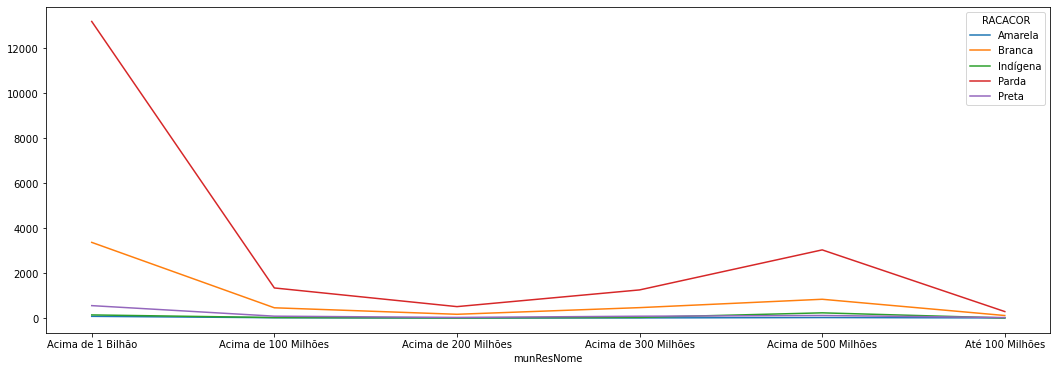

In [295]:
sinasc_raw.groupby(PIB)['RACACOR'].value_counts().unstack().plot(figsize=[18,6])

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

- No mês de Junho, a região geográfica imediata de Vilhena registrou a menor idade média das mulheres que deram a luz no ano de 2019. Já a mais alta, foi entre o mês de abril e maio, na região imediata de Jaru.

- A idade média das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto e mais baixo é a maior dentre todas.

In [278]:
4119/16632

0.24765512265512266

In [279]:
222/1807

0.12285556170448257

- A proporção de mães que estudaram 12 anos ou mais nos municípios com IDH alto é o dobro quando comparado com as mães de municípios com IDH baixo.

- A idade mediana das mães foi menor em todos os meses de 2019 nos municípios de IFDM (Índice FIRJAN de Desenvolvimento Municipal) "regular".

- Independente do PIB, a raça/cor dos filhos nascidos em 2019 nos municípios de Rondônia é majoritariamente parda.